# Tobigs 22기 3주차 정규세션 Ensemble 과제

# 과제1. High variance/bias

개념참조영상 : https://www.youtube.com/watch?v=EuBBz3bI-aA

## Q1. High variance의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ High variance는 모델이 훈련 데이터의 노이즈까지 학습해 훈련 데이터에 너무 과적합된 상태를 말한다. 이로 인해 새로운 데이터에 대해서는 성능이 떨어진다. 일반화 성능이 저하되는 문제가 있다.

## Q2. High bias의 정의 및 문제점에 대해 설명해주세요.

🐻‍❄️ High bias는 모델이 데이터의 기본 패턴을 제대로 학습하지 못하는 것이다. 이로 인해 훈련 데이터와 테스트 데이터 모두에서 오류율이 높아진다. 모델이 훈련 데이터의 패턴을 제대로 학습하지 못해 과소적합이 발생할 수 있고 일반화 능력도 떨어진다.

## Q3. High variance 와 high bias를 다룰때 적합한 ensemble 방식과 그 이유를 적어주세요.

- High variance problem : 🐻‍❄️ Bagging은 고분산 모델의 과적합을 방지한다. 개별 모델이 훈련 데이터의 특정 패턴이나 노이즈에 과도하게 적합되는 것을 방지하고, 여러 모델의 예측을 결합함으로써 분산을 줄일 수 있다. 랜덤 포레스트(Random Forest)가 대표적인 Bagging 기법이다.


- High bias problem : 🐻‍❄️ Boosting은 개별 모델이 단순하여 고편향을 가지고 있더라도, 여러 모델을 순차적으로 결합하여 점차적으로 편향을 줄인다. 이 과정에서 모델의 복잡도가 높아져 데이터의 복잡한 패턴을 학습할 수 있게 되며, 편향을 효과적으로 낮출 수 있다. 대표적인 Boosting 알고리즘으로는 AdaBoost, Gradient Boosting Machine(GBM), XGBoost 가 있다.

# 과제2. Ensemble 실습

데이터 출처: https://www.kaggle.com/sakshigoyal7/credit-card-customers

## 목표 : 은행 신용 카드 서비스 이탈 고객 예측 모델 만들기!

### 칼럼 설명
```
[features]
 - Customer_Age : 고객의 나이
 - Gender : 성별 (M=Male, F=Female)
 - Dependent_count : 부양하는 가족의 수
 - Education_Level : 고객의 최종 학력 (example: high school, college graduate, etc.)
 - Marital_Status : 결혼 상태 (Married, Single, Divorced, Unknown)
 - Income_Category : 소득 범주 (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, etc.)
 - Card_Category : 카드 종류 (Blue, Silver, Gold, Platinum)
 - Months_on_book : 은행과의 관계 기간 (개월 수)
 - Total_Relationship_Count : 고객이 보유한 전체 제품 수
 - Months_Inactive_12_mon : 최근 12개월 동안 비활성화된 개월 수
 - Contacts_Count_12_mon : 최근 12개월 동안의 연락 횟수
 - Credit_Limit : 신용 카드의 신용 한도
 - Total_Revolving_Bal : 신용 카드의 총 회전 잔액
 - Avg_Open_To_Buy : 구매 가능 신용 한도 (최근 12개월 평균)
 - Total_Amt_Chng_Q4_Q1 : 거래 금액 변화율 (4분기 대비 1분기)
 - Total_Trans_Amt :  총 거래 금액 (지난 12개월)
 - Total_Trans_Ct : 총 거래 횟수 (지난 12개월)
 - Total_Ct_Chng_Q4_Q1 : 거래 횟수 변화율 (4분기 대비 1분기)
 - Avg_Utilization_Ratio : 평균 카드 이용 비율

[target]
 - Attrition_Flag : 고객 활동 변수 / Existing Customer - 0, Attrited Customer - 1

```


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# 🐻‍❄️데이터의 경로는 변경해주세요
df = pd.read_csv('BankChurners.csv')

# Feature 21 & 22의 경우 데이터 셋에서 삭제하는 것을 추천하는 문구 발견, 삭제
print(len(df.columns))
df.drop(df.columns[[21, 22]], axis = 1, inplace = True) # inplace = True 데이터 원본에서 처리 not copy
print(len(df.columns))

23
21


In [9]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

## EDA & Preprocessing

EDA를 통해 인사이트를 얻고 전처리를 진행해주세요.

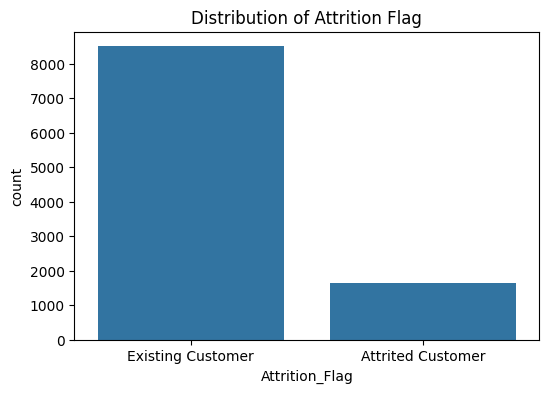

Numerical Features Description:
          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000           

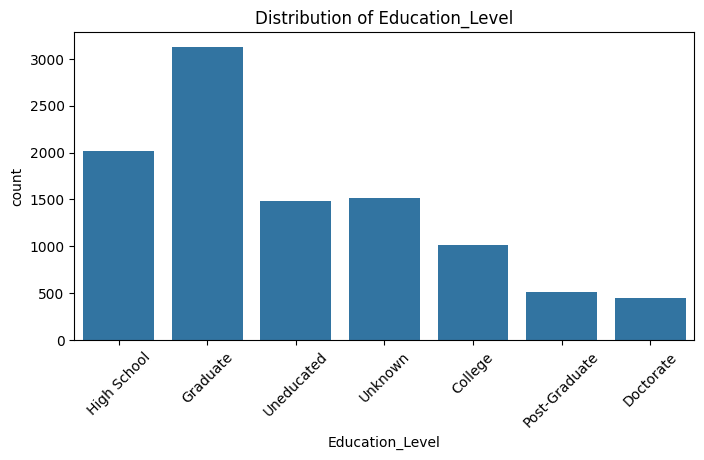

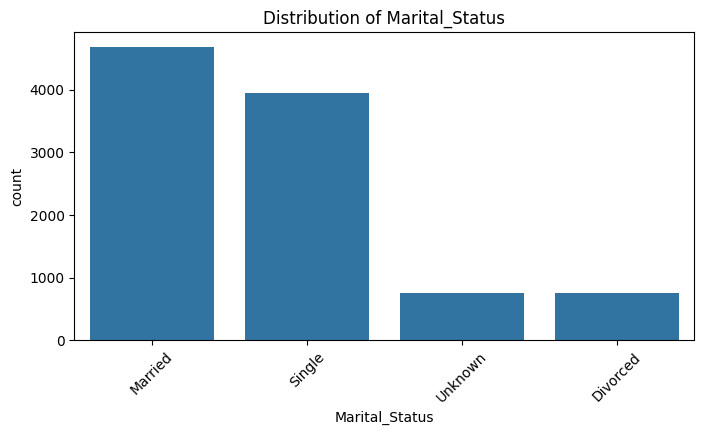

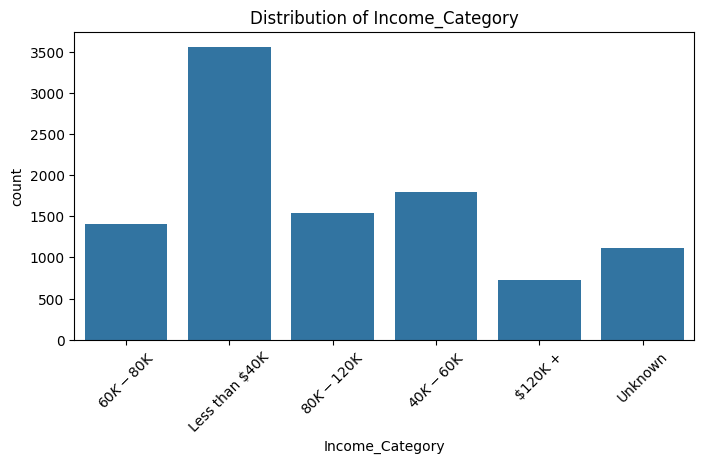

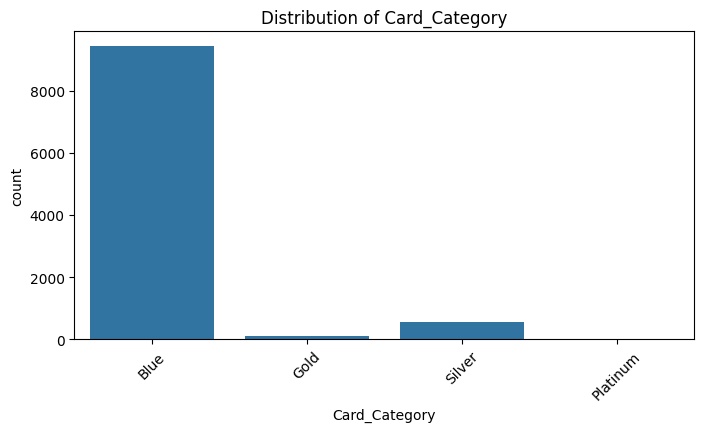

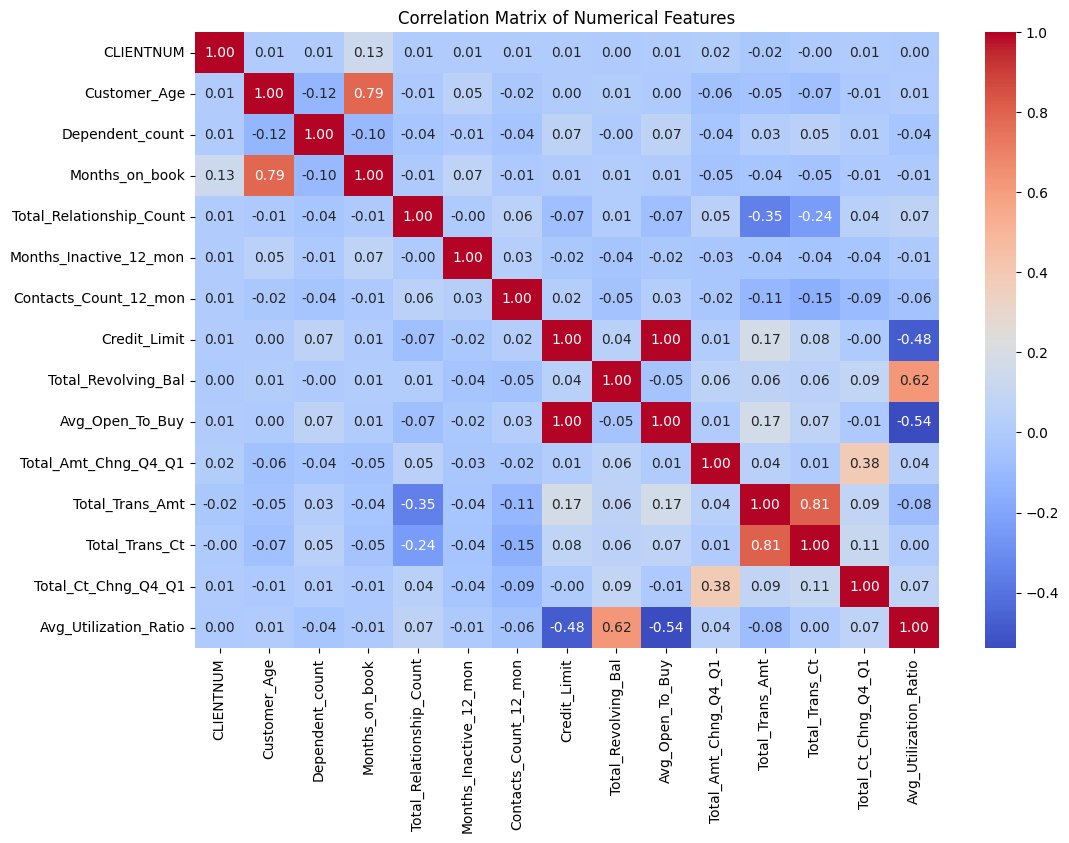

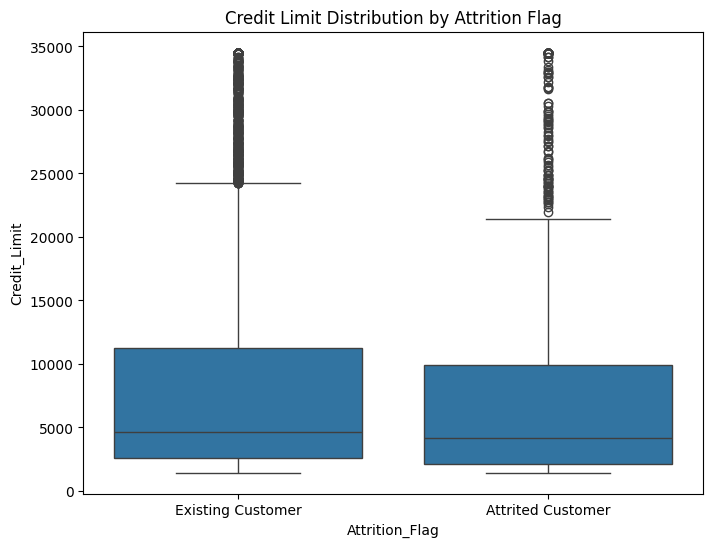

In [16]:
# 타겟 변수 분포 확인
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Distribution of Attrition Flag')
plt.show()

# 수치형 변수의 기본 통계량 확인
print("Numerical Features Description:")
print(df.describe())

# 범주형 변수의 고유값 개수 확인
print("Categorical Features Unique Values:")
print(df.select_dtypes(include=['object']).nunique())

# 범주형 변수들의 분포 확인
categorical_features = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# 수치형 변수들의 상관관계 분석
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# EDA로 인사이트 도출

# 고객 이탈 여부에 따른 신용한도(Credit_Limit) 분포 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition_Flag', y='Credit_Limit', data=df)
plt.title('Credit Limit Distribution by Attrition Flag')
plt.show()

## Modeling

다음 4가지 모델의 성능을 비교해주세요.
- Decision Tree
- Random Forest
- Adaboost
- Gradientboosting
- 이외 다른 ensemble 모델을 사용하셔도 됩니다!


In [18]:
# 타겟 변수와 특징 변수 분리
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag']

# 범주형 변수 인코딩
le = LabelEncoder()
y = le.fit_transform(y)

# X의 범주형 변수를 더미 변수로 변환
X = pd.get_dummies(X, drop_first=True)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 피처 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 학습 및 평가
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_preds))
print(confusion_matrix(y_test, dt_preds))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))

# AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
ada_preds = ada_model.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_preds)
print("AdaBoost Accuracy:", ada_accuracy)
print(classification_report(y_test, ada_preds))
print(confusion_matrix(y_test, ada_preds))

# GradientBoosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_preds)
print("GradientBoosting Accuracy:", gb_accuracy)
print(classification_report(y_test, gb_preds))
print(confusion_matrix(y_test, gb_preds))

# 성능 비교
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'AdaBoost', 'GradientBoosting'],
    'Accuracy': [dt_accuracy, rf_accuracy, ada_accuracy, gb_accuracy]
})

print("\nModel Performance Comparison:")
print(results)

Decision Tree Accuracy: 0.9220138203356367
              precision    recall  f1-score   support

           0       0.75      0.77      0.76       327
           1       0.96      0.95      0.95      1699

    accuracy                           0.92      2026
   macro avg       0.85      0.86      0.86      2026
weighted avg       0.92      0.92      0.92      2026

[[ 252   75]
 [  83 1616]]
Random Forest Accuracy: 0.9486673247778875
              precision    recall  f1-score   support

           0       0.92      0.75      0.82       327
           1       0.95      0.99      0.97      1699

    accuracy                           0.95      2026
   macro avg       0.94      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026

[[ 244   83]
 [  21 1678]]
AdaBoost Accuracy: 0.9516288252714709
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       327
           1       0.96      0.98      0.97      1699

    